'''
=================================================
MILESTONE 1

- Nama  : Nicholas Halasan
- Batch : HCK - 008

Program ini dibuat untuk melakukan analisis terhadap suatu problem statement dan dapat menjelaskan hasil analisisnya.
=================================================
'''

# **BAGIAN 1 : Identifikasi Masalah**

#### CASE :
Kamu adalah seorang Data Analyst yang akan mengerjakan projek besar untuk menyelesaikan suatu permasalahan client dan client kamu butuh sekali hasil analisa datamu menggunakan statistik dan dashboard visualisasi data untuk membantu mereka menyelesaikan masalah.

#### TOPIK :
Analisis Hubungan Gaya Hidup dengan Penyakit Diabetes Berdasarkan Dataset Diabetes Health Indicators.


#### PROBLEM STATEMENT :
Banyak sekali pasien yang tidak mengetahui dan tidak mau periksa bahwa mereka sudah berada di fase prediabetes bahkan fase diabetes, oleh karena itu pihak rumah sakit ingin membuat semacam indikasi dari gaya hidup pasien yang dapat mengarahkan mereka untuk menghindari terkena penyakit diabetes.


#### PROBLEM STATEMENT DENGAN METODE SMART
- *S*pesifik : Dapat mengidentifikasikan faktor-faktor apa saja yang berpengaruh secara signifikan terhadap tingkat penderita penyakit diabetes, dari gaya hidup pasien.

- *M*easurable :  Peningkatan pasien yang melakukan kontrol / periksa sebanyak 35%,terhadap penyakit diabetes berdasarkan faktor-faktor yang sudah diberikan.

- *A*chievable : Sumber daya : Data gaya hidup pasien dan riwayat kesehatannya, Kemampuan Analisis menggunakan python untuk melakukan analisis data pasien tersebut.

- *R*elevant : Relevansi tujuannya adalah agar client rumah sakit dapat mengalami peningkatan pada pasien yang melakukan cek diabetes. Untuk kepentingan publik juga menambah wawasannya agar lebih aware terhadap penyakit diabetes yang datang dari gaya hidup mereka.

- *T*ime-Bound :
Campaign ini akan dilakukan dalam waktu 3 bulan untuk dilihat hasilnya melalui catatan pasien yang melakukan check-up.

#### KESIMPULAN :
Rumah sakit ingin meningkatkan jumlah pasien yang melakukan check-up/kontrol untuk penyakit diabetes dengan membuat sebuah campaign ajakan untuk pola hidup yang sehat serta rutin check-up kesehatan khususnya diabetes dengan tujuan menaikan pamor rumah sakit itu sendiri dengan mengurangi jumlah pasien diabetes.

#### UNTUK MENJAWAB KEBUTUHAN RUMAH SAKIT DIATAS , DAPAT MENGGUNAKAN PENJABARAN MASALAH SEPERTI BERIKUT INI :
1.	Who = Siapa yang memiliki resiko tertinggi terkena diabetes? (gender,age)  V

2.	Where = Bagaimana distribusi korelasi variabel dengan penyakit diabetes? V

<!-- 3.	Why= mengapa rutin berolah raga dan tidak merokok mempengaruhi status diabetes?  -->

3. How = Bagaimana hubungan antara tingkat kolestrol dengan diabetes? Visual V
        
4.	How  = Apakah BMI dapat berpengaruh terhadap risiko terkena diabetes? Visual V

5.  Berapa standar deviasi BMI laki-laki dan perempuan yang terkena diabetes?

6.  What = Apakah melakukan aktifitas fisik 30 hari terkahir mempengaruhi BMI?  



# **BAGIAN 2 : Data Loading dan Eksplorasi sederhana**

#### IMPORT LIBRARY
Mengimport semua library yang diperlukan untuk analisa statistik seperti :


In [2]:
import pandas as pd
import chardet
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway, linregress, spearmanr
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

========================================================================================

#### IMPORT DATA DIABETES

'''

Function dibawah beerfungsi untuk membaca file csv yang hendak kita analisis, ini memudahkan jika kita harus melakukan run program dari awal agar datanya tidak hilang.

'''

In [3]:
ds = pd.read_csv('datadiabet.csv')
ds

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Data berhasil di load kedalam notebook.

==========================================================================================

#### EKSPLORASI DATA SEDERHANA

In [4]:
ds.shape

(253680, 22)

''' Melihat info summary data
'''

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
ds.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

INSIGHT :
- dataset memiliki total 22 kolom dan juga 253680 data.
- semua tipe datanya berupa float
- tidak terdapat missing value pada dataset, dilihat semua kolom memiliki jumlah non-null yang sama dengan jumlah data.
- Perlu dilakukan penghapusan kolom yang tidak dibutuhkan dan juga penggantian nama kolom agar lebih dapat dimengerti.

==========================================================================================

# **BAGIAN 3 : Data Cleaning**

#### MENGHAPUS KOLOM-KOLOM YANG TIDAK DIGUNAKAN DALAM ANALISIS

Total ada 12 Kolom yang tidak 
digunakan , yaitu : 'HighBP', 'Stroke', 'HeartDiseaseorAttack', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', dan 'Income'.

In [7]:
#Menggunakan For Loop untuk mendeteksi nama-nama kolom yang ingin dihapus.
for col in ds.columns: 
    if 'HighBP' in col:
        del ds[col]
    elif 'CholCheck' in col:
        del ds[col]
    elif 'Stroke' in col:
        del ds[col]
    elif 'HeartDiseaseorAttack' in col:
        del ds[col]
    elif 'AnyHealthcare' in col:
        del ds[col]
    elif 'NoDocbcCost' in col:
        del ds[col]
    elif 'GenHlth' in col:
        del ds[col]
    elif 'MentHlth' in col:
        del ds[col]
    elif 'PhysHlth' in col:
        del ds[col]
    elif 'DiffWalk' in col:
        del ds[col]
    elif 'Education' in col:
        del ds[col]
    elif 'Income' in col:
        del ds[col]
    




##### CEK APAKAH KOLOM SUDAH TERHAPUS :

In [8]:
ds.columns

Index(['Diabetes_012', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'Sex', 'Age'],
      dtype='object')

Kolom berhasil dihapus, sekarang hanya tersisa 10 kolom.

========================================================================================

#### MENGGANTI NAMA KOLOM AGAR LEBIH INFORMATIF

Mengganti nama kolom diabetes_012 yang merupakan status diabetes pasien , dan kolom HighChol yang merupakan kolom apakah pasien memiliki kolestrol yang tinggi

In [9]:
ds2 = ds.rename(columns = {"Diabetes_012": "StatusDiabetes", "HighChol": "Kolestrol"})

Nama kolom berhasil diganti.

========================================================================================

Karena tidak ada Missing value , Nilai duplicate, dan memang semua kolom yang dibutuhkan dalam representasi angka(float), maka proses cleaning data selesai dan data siap diolah.

#### MENGSAVE DATA YANG SUDAH DIBERSIHKAN KEDALAM CSV BARU BERNAMA 'datadiabetbersih.csv'

Hal ini dilakukan agar saat diperlukan runing ulang , data tidak hilang dan kita punya data bersihnya.

In [10]:
ds2.to_csv('databersih.csv', index=False)

data berhasil berhasil dibersihkan dan disimpan , siap untuk proses analisis

# **BAGIAN 4 : Analisis dan Perhitungan**

#### PENJELASAN NAMA KOLOM DAN ISI NYA :

1. StatusDiabetes = Kondisi Pasien apakah memiliki penyakit diabetes.
- 0 = Tidak Mengalami Diabetes
- 1 = Prediabetes
- 2 = Diabetes

2. Kolestrol = Apakah pasien memiliki Kolestrol tinggi / tidak.
- 0 = Tidak Kolestrol Tinggi
- 1 = Kolestrol Tinggi

3. BMI = Body Max Index 
- Dibawah 18,5 = UnderWeight.
- Antara 18,5 - 24,99 = Normal.
- Lebih besar atau sama dengan 25 = OverWeight.
- Lebih besar atau sama dengan 30 = Obesitas.

4. Smoker = Apakah pasien merupakan perokok (Merokok minimal 100 batang selama hidup)
- 0 = Bukan Perokok
- 1 = Perokok

5. PhysActivity = Apakah selama 30 hari terakhir rutin melakukan aktifitas fisik? (tidak termasuk bekerja)
- 0 = Tidak
- 1 = Iya

6. Fruits = Mengkonsumsi minimal 1 buah per hari.
- 0 = Tidak
- 1 = Iya

7. Veggies = Mengkonsumsi minimal 1 sayuran per hari.
- 0 = Tidak
- 1 = Iya

8. HvyAlcoholConsump = Apakah merupakan peminum berat? (Laki=Laki = lebih dari 14x per minggu, Wanita = lebih dari 7x per minggu)
- 0 = Tidak
- 1 = Iya

9. Sex = Jenis Kelamin
- 0 = Perempuan
- 1 = Laki - Laki

10. Age = Kelompok Usia , Terdapat 13 Kelompok usia:
- 1 = 18 - 24 Tahun
- 2 = 25 - 29 Tahun
- 3 = 30 - 34 Tahun
- 4 = 35 - 39 Tahun
- 5 = 40 - 44 Tahun
- 6 = 45 - 49 Tahun
- 7 = 50 - 54 Tahun
- 8 = 55 - 59 Tahun
- 9 = 60 - 64 Tahun
- 10 = 65 - 69 Tahun
- 11 = 70 - 74 Tahun
- 12 = 75 - 79 Tahun
- 13 = 80 Tahun / Lebih

#### 1. MELIHAT KELOMPOK YANG TERKENA DIABETES TERTINGGI (Gender dan Usia)

In [62]:
Gender =[]
Diabetes = []
RangeUmur = []
for row in ds2['Sex']:
    if row == 1.0:
        Gender.append('Male')
    else :
        Gender.append('Female')
for j in ds2['StatusDiabetes']:
    if j == 0.0:
        Diabetes.append('Tidak Diabetes')
    elif j == 1.0:
        Diabetes.append('Prediabetes')
    elif j == 2.0:
        Diabetes.append('Diabetes')


ds2['Gender']= Gender
ds2['Diabetes'] = Diabetes



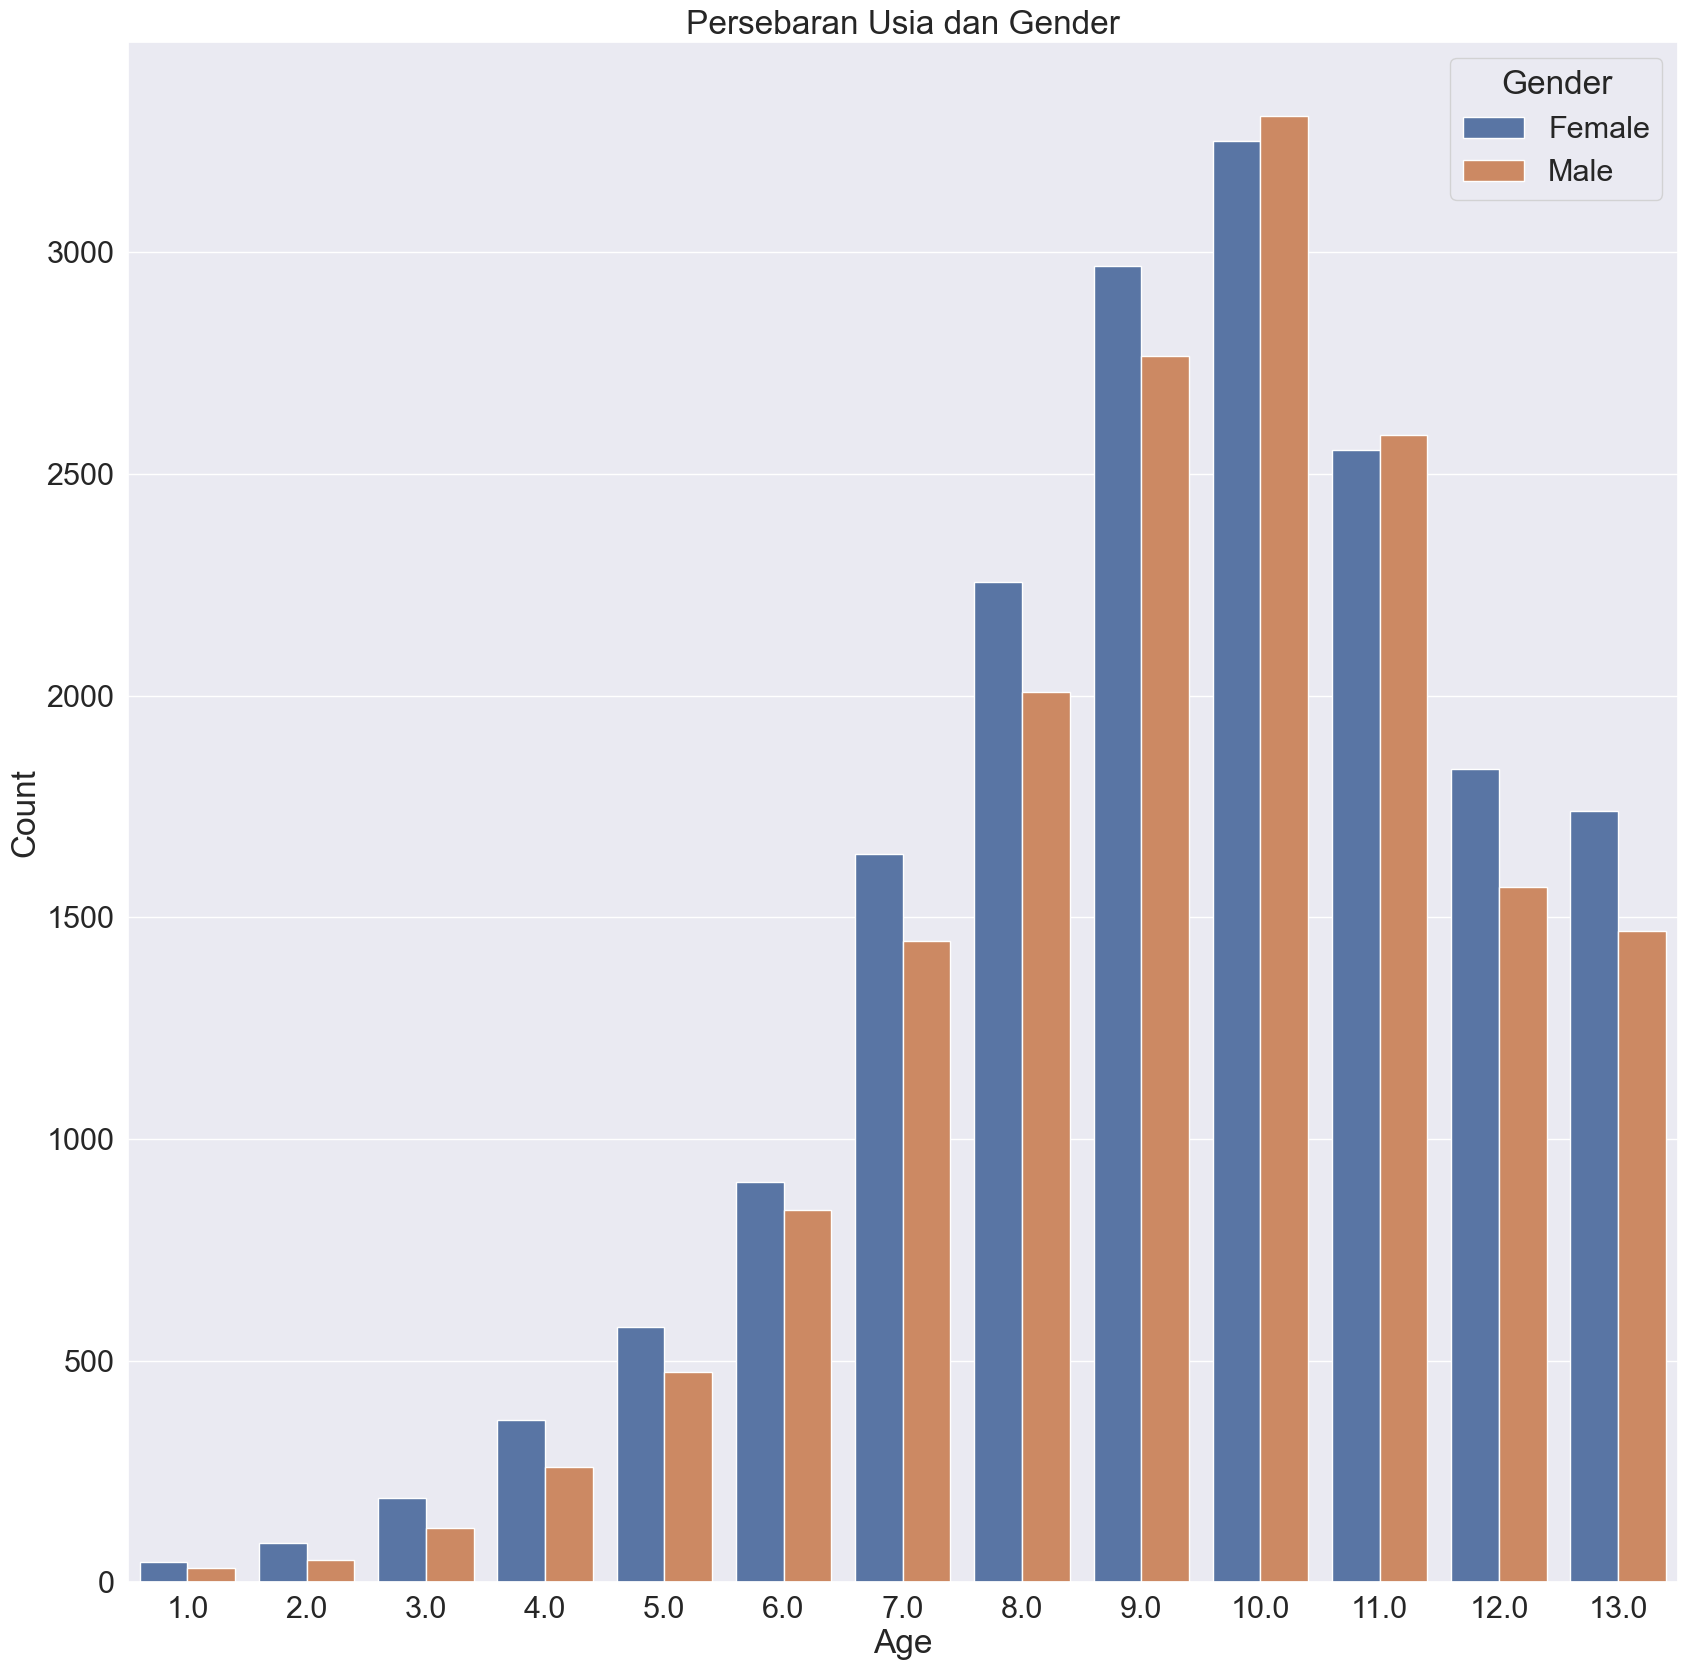

In [121]:
plt.figure(figsize=(20,20))
sns.countplot(x='Age', data=diabetonly5, hue='Gender')
plt.title('Persebaran Usia dan Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

INSIGHT : 
- Dapat dilihat bahwa kategori umur yang paling rentan terkena diabetes adalah kategori 10 , dan Gender nya laki - laki
- ***Jadi pada data ini yang paling banyak terkena diabetes adalah Laki-laku berumur 65 - 69 Tahun.***

#### 2. MELIHAT KORELASI VARIABEL YANG ADA TERHADAP STATUS DIABETES

C:\Users\ACER\AppData\Local\Temp\ipykernel_20828\529511635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds2.corr()['StatusDiabetes'][:-1].sort_values().plot(kind='bar')


<Axes: >

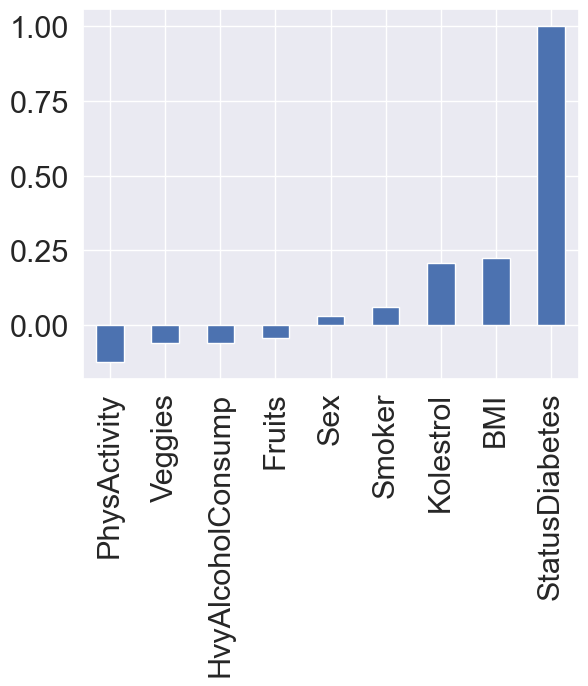

In [82]:
ds2.corr()['StatusDiabetes'][:-1].sort_values().plot(kind='bar')

INSIGHT : 
- BMI dan Kolestrol memiliki korelasi positif yang kuat terhadap diabetes, semakin tinggi nilai BMI dan Kolestrol , semakin tinggi pula status diabetesnya.
- Sedangkan PhysActivity dan Veggies memiliki korelasi negatif yang kuat terhadap diabetes dari semua variabel yang ada , semakin tinggi aktifitas fisik dan konsumsi sayuran , semakin rendah pula status diabetesnya.

#### PERSENTASE STATUS DIABETES PASIEN 

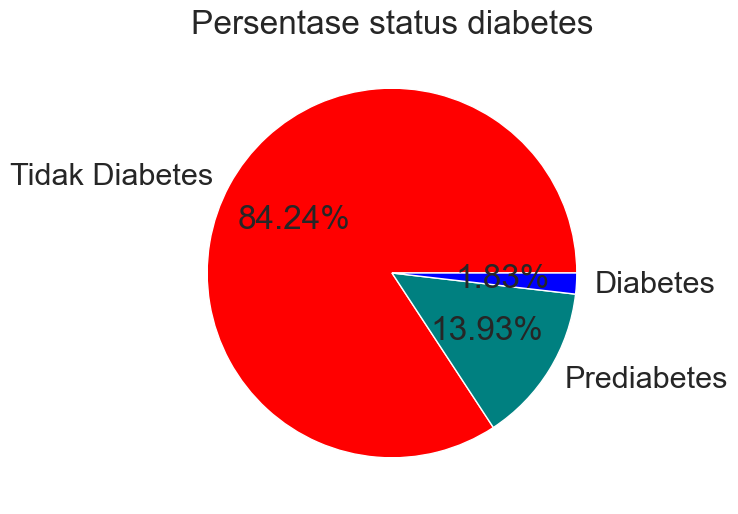

In [114]:
plt.figure(figsize=(10,6))
plt.pie(ds2['Diabetes'].value_counts(), labels=['Tidak Diabetes','Prediabetes','Diabetes'], autopct='%1.2f%%', colors=['red', 'teal','blue'])
plt.title('Persentase status diabetes')
plt.show()

INSIGHT : Dari total 360 ribu data pasien , hanya 1.83% Pasien yang mengalami diabetes, namun terdapat 13,93 Persen pasien yang berada di fase Prediabetes atau dizona tidak aman (berpotensi terkena diabetes).

#### 3. HUBUNGAN KOLESTROL TINGGI DENGAN DIABETES?

In [110]:
diabetonly5 = ds2.where(ds2.Diabetes == 'Diabetes')
diabetonly5.dropna(inplace=True)
diabetonly5

,StatusDiabetes,Kolestrol,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Gender,Diabetes
8,2.0,1.0,30.0,1.0,0.0,1.0,1.0,0.0,0.0,9.0,Female,Diabetes
10,2.0,0.0,25.0,1.0,1.0,1.0,1.0,0.0,1.0,13.0,Male,Diabetes
13,2.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,Female,Diabetes
17,2.0,0.0,23.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,Male,Diabetes
23,2.0,0.0,27.0,0.0,1.0,1.0,1.0,0.0,0.0,13.0,Female,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...
253659,2.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,Female,Diabetes
253668,2.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,1.0,10.0,Male,Diabetes
253670,2.0,1.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,Female,Diabetes
253676,2.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,Female,Diabetes


Text(0.5, 1.0, 'Kolestrol Tinggi pada pasien Diabetes')

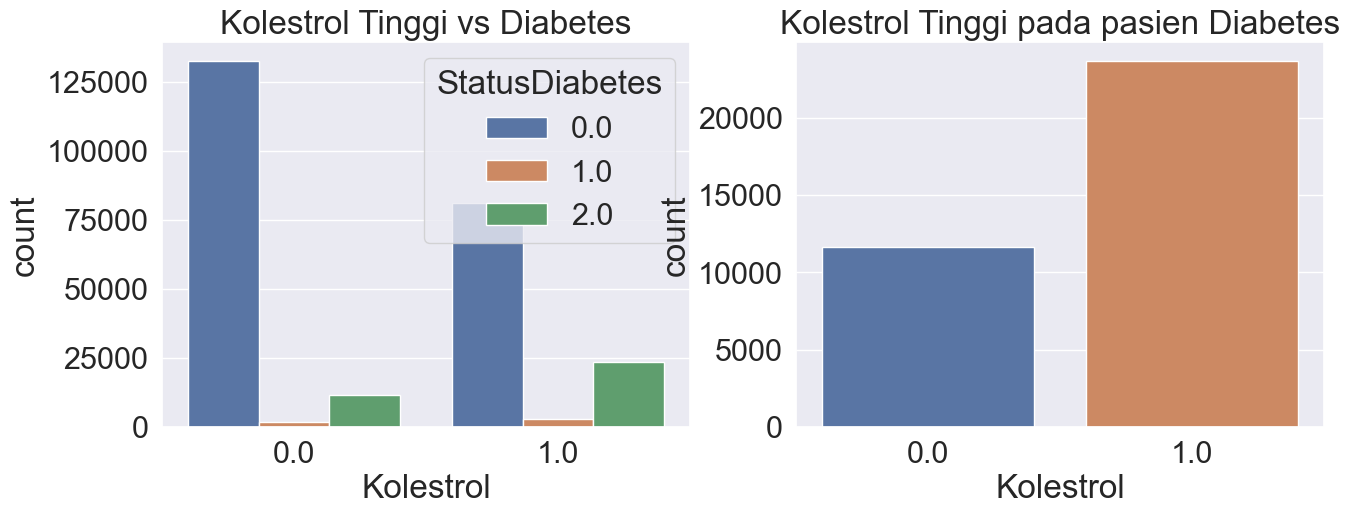

In [118]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Kolestrol', data=ds2, hue='StatusDiabetes', ax=ax[0]).set_title('Kolestrol Tinggi vs Diabetes')
sns.countplot(x='Kolestrol', data=diabetonly5, ax=ax[1]).set_title('Kolestrol Tinggi pada pasien Diabetes')

* Status diabetes :
- 0 = Tidak diabet
- 1 = Pradiabet
- 2 = Diabetes

* Kolestrol :
- 0 = Tidak Kolestrol tinggi
- 1 = Kolestrol Tinggi


INSIGHT : 
- Dari grafik sebelah kiri : Kita lihat jumlah orang yang tidak terkena diabetes jauh menurun berdasarkan status kolestrol nya (saat kolestrol naik , jumlah orang yang tidak terkena diabetes menurun) , Sedangkan orang yang terkena diabetes meningkat dari yang tidak punya kolestrol terhadap yang punya kolestrol
- Dari grafik sebelah kanan : Pada data diabetes, Orang yang kolestrolnya tinggi lebih banyak dari orang yang kolestrolnya rendah .
- Dari sini dapat ditarik bahwa kedua hal ini berhubungan , karena pada saat orang mengalami kolestrol tinggi , maka chance untuk terkena diabetesnya juga semakin tinggi


#### 4. APAKAH BMI DAPAT MEMPENGARUHI DIABETES?

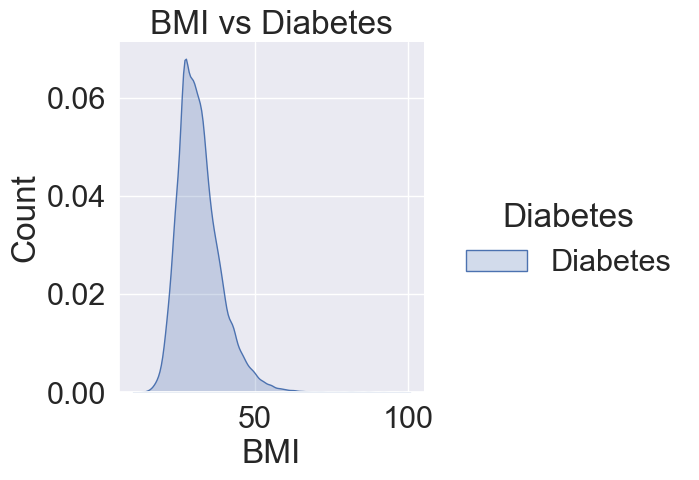

In [120]:
sns.displot(diabetonly5, x="BMI", hue="Diabetes", kind="kde", fill=True)
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

- Dibawah 18,5 = UnderWeight.
- Antara 18,5 - 24,99 = Normal.
- Lebih besar atau sama dengan 25 = OverWeight.
- Lebih besar atau sama dengan 30 = Obesitas.

INSIGHT : Jika BMI nya makin tinggi , maka countnya makin tinggi secara signifikan , artinya BMI makin tinggi , maka semakin banyak orang yang terkena diabetes. Grafik sangat memuncak saat nilai BMI di sekitar 25-30 . Dapat ditarik jika orang yang mengalami diabetes didominasi dengan orang yang  status BMI nya overweight dan obesitas.

#### 5. STATISTIKA DESKRIPTIF

Bagaimana persebaran data BMI laki-laki dan perempuan yang terkena diabetes?

In [171]:
ds3 = ds2[ds2['StatusDiabetes']== 2.0] # Membuat ds3 khusus untuk pasien yang diabetes saja 

ds3laki = ds3[ds3['Gender']=='Male']
ds3wanita = ds3[ds3['Gender']=='Female']

meanBMIlaki = ds3laki['BMI'].mean()
meanBMIwanita = ds3wanita['BMI'].mean()

medBMIlaki = ds3laki['BMI'].median()
medBMIwanita = ds3wanita['BMI'].median()

stdBMIlaki = ds3laki['BMI'].std()
stdBMIwanita = ds3wanita['BMI'].std()

print (f"Mean BMI untuk pasien diabetes laki-laki adalah {meanBMIlaki}")
print (f"Mean BMI untuk pasien diabetes wanita adalah {meanBMIwanita}")
print (f"Median BMI untuk pasien diabetes laki-laki adalah {medBMIlaki}")
print (f"Median BMI untuk pasien diabetes wanita adalah {medBMIwanita}")
print (f"Standar deviasi BMI untuk pasien diabetes laki-laki adalah {stdBMIlaki}")
print (f"Standar deviasi BMI untuk pasien diabetes wanita adalah {stdBMIwanita}")



Mean BMI untuk pasien diabetes laki-laki adalah 31.333628579864186
Mean BMI untuk pasien diabetes wanita adalah 32.50545869317256
Median BMI untuk pasien diabetes laki-laki adalah 30.0
Median BMI untuk pasien diabetes wanita adalah 31.0
Standar deviasi BMI untuk pasien diabetes laki-laki adalah 6.628462729784059
Standar deviasi BMI untuk pasien diabetes wanita adalah 7.938725830449462


- dapat dilihat dari kedua data serupa , yaitu median dan standar deviasinya sangat jauh , jadi persebaran datanya sangat besar.

#### 6. STATISTIKA INFERENSIAL : Apakah melakukan aktifitas fisik 30 hari terkahir mempengaruhi BMI

In [172]:
BMIkategori = []
for m in ds2['BMI']:
    if m < 18.5 :
        BMIkategori.append('Underweight')
    elif m < 24.99 :
        BMIkategori.append('Normal')
    elif m >= 25 and m < 30 :
        BMIkategori.append('Overweight')
    elif m >= 30 :
        BMIkategori.append('Obesitas')

ds2['BMI Kategori'] = BMIkategori

ds2.head(15)

ds2.to_csv('databaru.csv',index =False)


- H0 = Mengkonsumsi buah dan sayur tidak mempengaruhi BMI
- H1 = Mengkonsumsi buah dan sayur mempengaruhi BMI

membuat kolum baru bernama BMI kategori berdasarkan BMI

In [137]:
ds2['BMI Kategori'].unique()

array(['Obesitas', 'Overweight', 'Normal', 'Underweight'], dtype=object)

In [151]:
contingency_table = pd.crosstab(ds2['PhysActivity'],ds2['BMI'])
contingency_table

BMI,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,...,86.0,87.0,88.0,89.0,90.0,91.0,92.0,95.0,96.0,98.0
PhysActivity,,,,,,,,,,,,,,,,,,,,,
0.0,2,7,16,60,132,224,449,817,1131,1687,...,1,22,0,6,1,0,9,7,0,3
1.0,4,14,25,72,216,552,1354,3151,5196,8168,...,0,39,2,22,0,1,23,5,1,4


In [143]:
from scipy import stats

In [150]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.0


** INSIGHT **
- karena menggunakan keyakinan 95%, sehingga critial value 5% / 0,05 
- p-value < critical value
- H0 Ditolak , Sehingga digunakan H1
- Kesimpulan : Aktifitas fisik berpengaruh pada tingkat BMI

# **BAGIAN 5 : Kesimpulan**

*KESMIPULAN :*
- Dari data pasien , kelompok yang paling banyak terkena diabetes adalah kelompok laki-laki dengan rentang usia 65-69 Tahun
- Dari semua faktor kesehatan , BMI dan Kolestrol memiliki korelasi tertinggi terhadap diabetes, atau dengan kata lain semakin tinggi nilai BMI dan Kolestrol , Semakin tinggi pula kemungkinan terkena diabetes
- Dari faktor gaya hidup ,Konsumsi sayuran yang tertinggi korelasinya terhadap diabetes, semakin banyak konsumsi sayuran  , semakin rendah kemungkinan terkena diabetes.
- Aktifitas fisik berpengaruh kepada BMI , semakin banyak aktifitas fisik yang dilakukan maka BMI kita akan berkurang
- Persebaran nilai BMI laki-laki yang terkena diabetes dan wanita yang terkena diabetes sangat besar cakupannya.
- Jadi banyak faktor yang dapat mempengaruhi DIABETES , yang paling tinggi adalah BMI , Kadar Kolestrol , Aktifitas fisik , dan konsumsi makanan yang sehat (buah atau sayuran).
